# Customer Conversion Prediction

## Problem Statement
You are working for a new-age insurance company and employ
multiple outreach plans to sell term insurance to your
customers. Telephonic marketing campaigns still remain one of
the most effective ways to reach out to people however they
incur a lot of cost. Hence, it is important to identify the
customers that are most likely to convert beforehand so that
they can be specifically targeted via call. We are given the
historical marketing data of the insurance company and are
required to build a ML model that will predict if a client will
subscribe to the insurance.

To solve this problem, we will follow the following steps:

1. Data Preprocessing
2. Exploratory Data Analysis
3. Feature Selection
4. Model Building
5. Model Evaluation

## 1.Data Preprocessing

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

In [2]:
df = pd.read_csv("Customer Conversion Prediction.csv")

In [3]:
df.head(5)

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y
0,58,management,married,tertiary,unknown,5,may,261,1,unknown,no
1,44,technician,single,secondary,unknown,5,may,151,1,unknown,no
2,33,entrepreneur,married,secondary,unknown,5,may,76,1,unknown,no
3,47,blue-collar,married,unknown,unknown,5,may,92,1,unknown,no
4,33,unknown,single,unknown,unknown,5,may,198,1,unknown,no


In [4]:
# check the information available on data like data types, number of null columns, total number of columns, column name, etc.,
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             45211 non-null  int64 
 1   job             45211 non-null  object
 2   marital         45211 non-null  object
 3   education_qual  45211 non-null  object
 4   call_type       45211 non-null  object
 5   day             45211 non-null  int64 
 6   mon             45211 non-null  object
 7   dur             45211 non-null  int64 
 8   num_calls       45211 non-null  int64 
 9   prev_outcome    45211 non-null  object
 10  y               45211 non-null  object
dtypes: int64(4), object(7)
memory usage: 3.8+ MB


In [5]:
# Check the number of unique values in each column
print(df.nunique())

age                 77
job                 12
marital              3
education_qual       4
call_type            3
day                 31
mon                 12
dur               1573
num_calls           48
prev_outcome         4
y                    2
dtype: int64


## 2. Exploratory Data Analysis

Text(0.5, 1.0, 'Number of Calls')

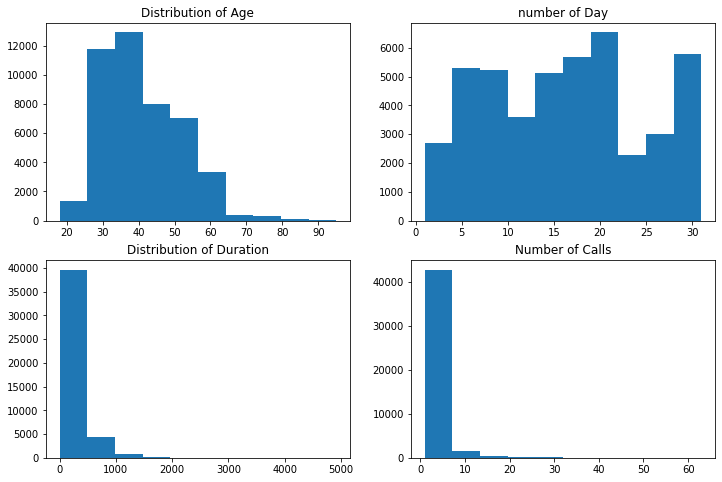

In [6]:
import matplotlib.pyplot as plt

# Create subplots for all numerical columns
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))

# Plot histograms
axs[0, 0].hist(df["age"])
axs[0, 1].hist(df["day"])
axs[1, 0].hist(df["dur"])
axs[1, 1].hist(df["num_calls"])

# Add titles to subplots
axs[0, 0].set_title("Distribution of Age")
axs[0, 1].set_title("number of Day")
axs[1, 0].set_title("Distribution of Duration")
axs[1, 1].set_title("Number of Calls")



The plots above provide clear insights that:

1. Customers aged between 25 to 40 have shown more interest in insurance and have a higher probability of conversion.
2. Majority of the calls had a duration of 0 to 500 seconds.

<AxesSubplot: >

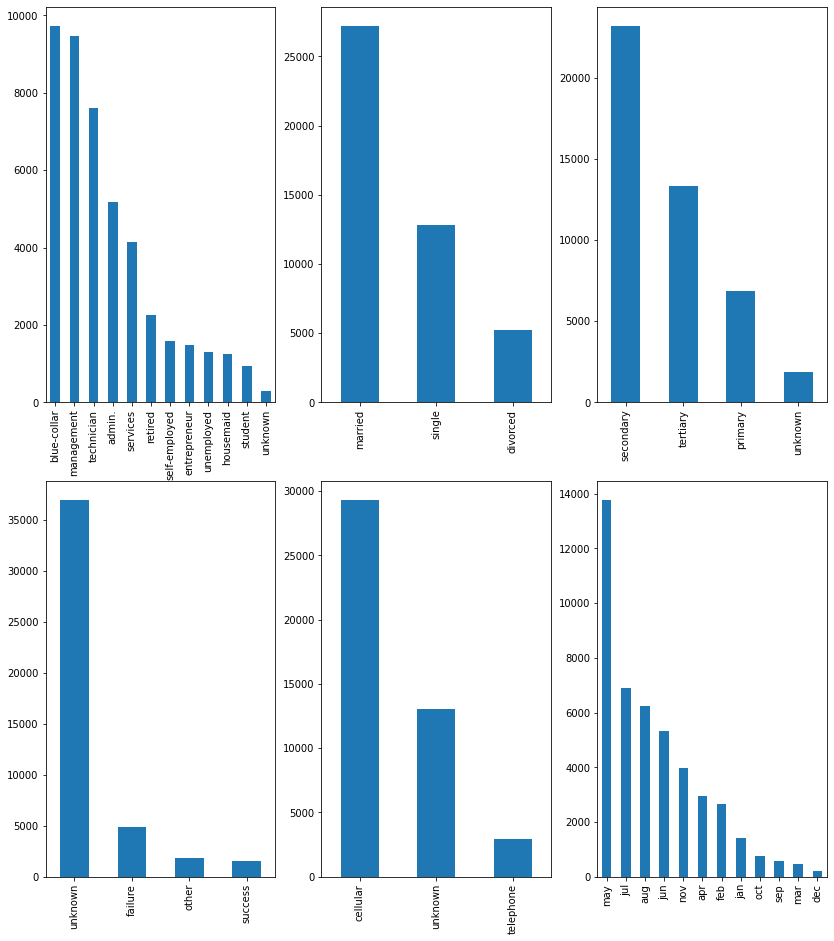

In [7]:
import seaborn as sns

# Check the distribution of the categorical variables
# Create subplots for all categorical columns

fig1, axs = plt.subplots(nrows=2, ncols=3, figsize=(14, 16))

# Plot each categorical variable
df["job"].value_counts().plot(kind="bar", ax=axs[0,0])
df["marital"].value_counts().plot(kind="bar", ax=axs[0,1])
df["education_qual"].value_counts().plot(kind="bar", ax=axs[0,2])
df["prev_outcome"].value_counts().plot(kind="bar", ax=axs[1,0])
df["call_type"].value_counts().plot(kind="bar", ax=axs[1,1])
df["mon"].value_counts().plot(kind="bar", ax=axs[1,2])



Based on the plots shown above, we can infer that:

1. The occupations Blue-collar, Management, and Technician are more interested in subscribing to insurance. Conversely, unemployed, housemaids, and students are less likely to opt for insurance, as there is less data available for them.
2. Married individuals show more interest in insurance compared to divorced or single individuals.
3. Most of the customers have completed secondary or tertiary education.
4. Cellular communication is the most commonly used communication medium among customers.
5. The month of May has a higher number of customers. Conversely, the month of December has fewer customers.

<AxesSubplot: >

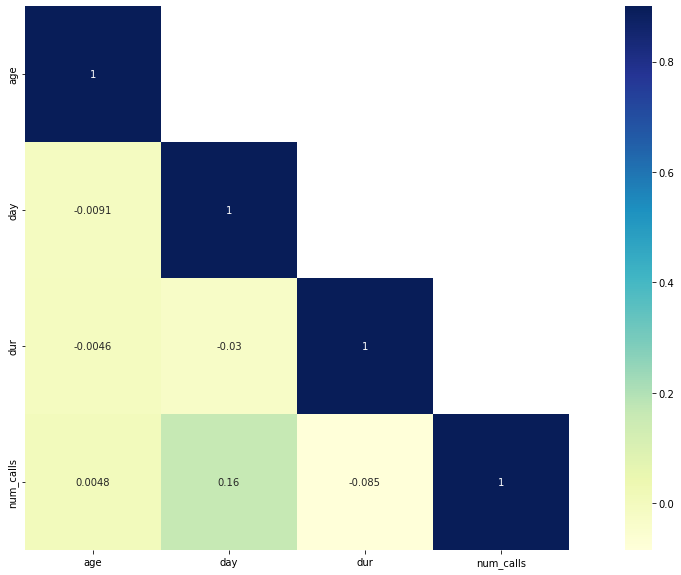

In [8]:
corr = df.corr()
mask = np.array(corr)
mask[np.tril_indices_from(mask)] = False
fig,ax= plt.subplots()
fig.set_size_inches(20,10)
sns.heatmap(corr, mask=mask,vmax=.9, square=True,annot=True, cmap="YlGnBu")

It can be deduced that there is a strong correlation between the duration of the call and the target variable. This inference can be validated as well. When the duration of the call is longer, there is a greater likelihood that the client is interested in the term deposit, and consequently, a higher probability that they will subscribe to it.

## 3. Feature Selection

In [9]:
# Check the distribution of the target variable
print(df['y'].value_counts())

no     39922
yes     5289
Name: y, dtype: int64


We can see that there are no missing values in the data. The column contains categorical datas are job, marital, education_qual, call_type, prev_outcome, month. The target variable y is imbalanced, with the majority of clients not subscribing to the insurance. We will need to address this issue later when training the model.

## 4. Model Building

Next, we will prepare the data for training the model. We will perform the following steps:

Convert categorical variables to numerical variables using one-hot encoding
Convert the target variable to a binary variable
Split the data into training and testing sets

In [10]:
# Convert categorical variables to numerical variables
df_encoded = pd.get_dummies(df, columns=['job', 'marital', 'education_qual', 'call_type', 'prev_outcome','mon'])

In [11]:
# Convert the target variable to a binary variable
df_encoded['y'] = np.where(df_encoded['y'] == 'yes', 1, 0)

In [12]:
# Split the data into training and testing sets
X = df_encoded.drop('y', axis=1)
y = df_encoded['y']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

We will train the data using different classifier to check their accuracy.

### RandomForestClassifier

In [13]:
# Train a random forest classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [14]:
# Evaluate the performance of the model on the testing data
y_pred_proba = rf.predict_proba(X_test)[:,1]
auroc = roc_auc_score(y_test, y_pred_proba)
y_pred = (y_pred_proba > 0.5).astype(int)
print("Accuracy Score of RandomForestClassifier:",round(accuracy_score(y_test, y_pred),2))
print("ROC AUC Score of RandomForestClassifier:",round(auroc,2))

Accuracy Score of RandomForestClassifier: 0.9
ROC AUC Score of RandomForestClassifier: 0.92


### Logistic Regression

In [15]:
logreg = LogisticRegression(random_state=50, max_iter = 1000)
logreg.fit(X_train, y_train)
y_pred_proba = logreg.predict(X_test)
print("Accuracy Score of Logistic Reg:",round(accuracy_score(y_test, y_pred_proba),2))
L_AUC_ROC = roc_auc_score(y_test, y_pred_proba)
print("ROC AUC Score of Logistic Reg:",round((L_AUC_ROC),2))

Accuracy Score of Logistic Reg: 0.9
ROC AUC Score of Logistic Reg: 0.66


### Decision Tree Classifier

In [16]:
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
y_pred_proba = dt.predict(X_test)
acc = accuracy_score(y_test, y_pred_proba)
auroc = roc_auc_score(y_test, y_pred_proba)
print("Accuracy Score of DecisionTreeClassifier:", round(acc,2))
print("ROC AUC Score of DecisionTreeClassifier:",round(auroc, 2))

Accuracy Score of DecisionTreeClassifier: 0.87
ROC AUC Score of DecisionTreeClassifier: 0.69


### K Nearest Neighbours

In [17]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred_proba = knn.predict(X_test)
acc = accuracy_score(y_test, y_pred_proba)
auroc = roc_auc_score(y_test, y_pred_proba)
print("Accuracy Score of KNeighborsClassifier:", round(acc,2))
print("ROC AUC Score of KNeighborsClassifier:",round(auroc, 2))

Accuracy Score of KNeighborsClassifier: 0.88
ROC AUC Score of KNeighborsClassifier: 0.6


### Native Bayes

In [18]:
nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred_proba = nb.predict(X_test)
acc = accuracy_score(y_test, y_pred_proba)
auroc = roc_auc_score(y_test, y_pred_proba)
print("Accuracy Score of Naive Bayes:", round(acc,2))
print("ROC AUC Score of KNeighborsClassifier:",round(auroc, 2))

Accuracy Score of Naive Bayes: 0.86
ROC AUC Score of KNeighborsClassifier: 0.69


## 5. Model Evaluation

Our Random Model Classifier Model have ROC AUC Score of 0.92 and as well as Accuracy Score around 0.9.

We will utilize the Random Forest Classifier Model, which has an accuracy rate of 90%, to generate predicted outputs. These predicted outputs can be utilized by our company's employees to more effectively target and convert clients, ultimately leading to satisfied customers. This will result in time and cost savings for both the employee and the company. Additionally, these predictions will enable the company to implement tele-marketing campaigns that are more efficient and have a higher customer conversion rate.